In [1]:
#Importing the dataset(images)
import glob,string
path = r'Downloads/Dataset/coil-100/*.png'
Images=glob.glob(path)

In [2]:
import tensorflow as tf

In [3]:
Images[1]

'Downloads/Dataset/coil-100\\obj100__10.png'

In [4]:
file = Images[0].split("/")[-1].split("__")[0]

In [5]:
file

'coil-100\\obj100'

In [6]:
Images[100]

'Downloads/Dataset/coil-100\\obj10__220.png'

In [7]:
file1 = Images[0].split("\\")[-1].split("__")[0]

In [8]:
file1

'obj100'

In [9]:
import pandas as pd
import numpy as np

In [10]:
import codecs
from tqdm import tqdm #to track progress

def construct_df(files):
    data = []
    for file in tqdm(files):
        data.append((file,file.split("\\")[-1].split("__")[0]))
    return pd.DataFrame(data, columns = ['path','label'])

In [11]:
df = construct_df(Images)

100%|██████████████████████████████████████████████████████████████████████████| 7200/7200 [00:00<00:00, 173390.99it/s]


In [12]:
df.shape

(7200, 2)

In [13]:
df.tail()

,path,label
7195,Downloads/Dataset/coil-100\obj9__75.png,obj9
7196,Downloads/Dataset/coil-100\obj9__80.png,obj9
7197,Downloads/Dataset/coil-100\obj9__85.png,obj9
7198,Downloads/Dataset/coil-100\obj9__90.png,obj9
7199,Downloads/Dataset/coil-100\obj9__95.png,obj9


In [14]:
len(df['label'].unique())

100

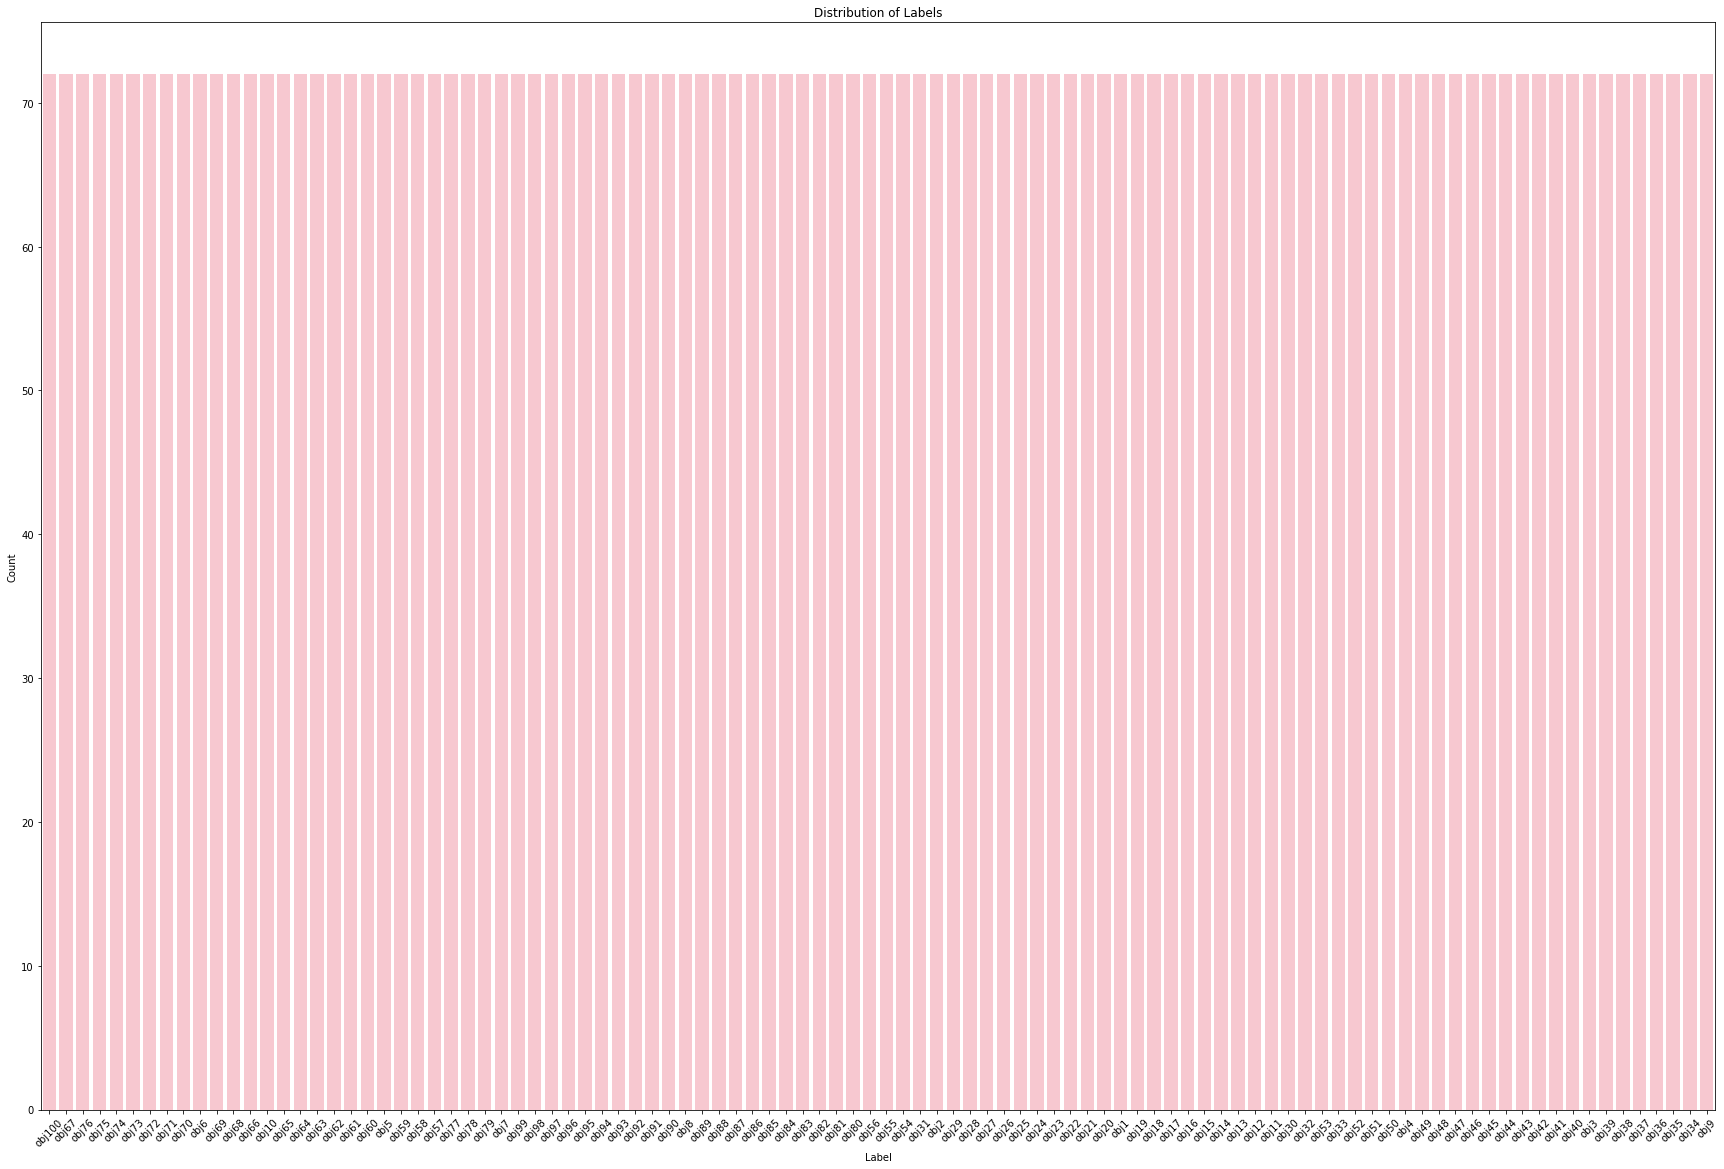

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Group by label and count occurrences
label_counts = df['label'].value_counts()

# Create the bar plot
plt.figure(figsize=(30, 20))
sns.barplot(x=label_counts.index, y=label_counts.values, color = 'pink')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.show()

In [16]:
#Train, Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.path, df.label, test_size=0.15,random_state=0)

In [17]:
X_train.shape

(6120,)

In [18]:
#converting images to array
from keras.preprocessing.image import load_img, img_to_array
import cv2
X_train = [img_to_array(cv2.imread(Images).astype("float")/255.0) for Images in tqdm(X_train.values)]
X_test=[img_to_array(cv2.imread(file).astype("float")/255.0) for file in tqdm(X_test.values)]

100%|█████████████████████████████████████████████████████████████████████████████| 1080/1080 [00:10<00:00, 107.96it/s]


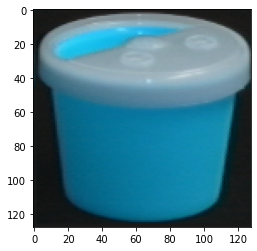

(128, 128, 3)

In [20]:
import matplotlib.pyplot as plt
img = X_train[0]
plt.imshow(img)
plt.show()
img.shape

In [21]:
#One hot encoding labels
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train_categorical=encoder.fit_transform(y_train)
y_test_categorical=encoder.transform(y_test)

In [23]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [24]:
#Defining a model
model = tf.keras.models.Sequential()

#1st convolution layer with the input shape
model.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, padding="same", activation="relu", input_shape=[128, 128, 3]))

#2nd convolution layer and Max pooling layer
model.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

#dropot to generalise the model
model.add(tf.keras.layers.Dropout(0.2))

#flatten the layer
model.add(tf.keras.layers.Flatten())

#fully connected layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=50, activation='relu'))

#output layer
model.add(tf.keras.layers.Dense(units=100, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 30)      840       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 30)      8130      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 30)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 30)        0         
                                                                 
 flatten (Flatten)           (None, 122880)            0         
                                                                 
 dense (Dense)               (None, 128)               15728768  
                                                        

In [26]:
model.compile(loss="categorical_crossentropy", optimizer='Adam',metrics=["accuracy"])

In [27]:
model.fit(X_train, y_train_categorical, epochs=5)

Epoch 1/5
192/192 [==============================] - 369s 2s/step - loss: 2.0061 - accuracy: 0.5469
Epoch 2/5
192/192 [==============================] - 230s 1s/step - loss: 0.1699 - accuracy: 0.9574
Epoch 3/5
192/192 [==============================] - 219s 1s/step - loss: 0.0382 - accuracy: 0.9889
Epoch 4/5
192/192 [==============================] - 216s 1s/step - loss: 0.0785 - accuracy: 0.9809
Epoch 5/5
192/192 [==============================] - 219s 1s/step - loss: 0.0652 - accuracy: 0.9843


In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)

34/34 [==============================] - 9s 224ms/step - loss: 0.0521 - accuracy: 0.9806
